# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

---

Before we begin, we define a few useful functions. The first takes an initial asset price, strike price, volatility, time to expiration, and the risk-free interest rate, and returns the Black-Scholes value of a European call option. The second takes the same arguments and returns the Black-Scholes value of a European put option.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from scipy.stats import norm
from scipy.optimize import curve_fit
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

def bs_call_t_deriv_approx(S0, K, sigma, t=1, r=0):

    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)

    return S0*norm.pdf(d1)*(sigma/(2*np.sqrt(t))) - r*K*np.exp(-r*t)*norm.cdf(d2)

# Time Sensitivity of a Call Option

## Observations from the Visual

The code below provides a visual for the value of a call option as the expiration time increases. To better help with the visualization, sliders have been added to adjust the spot price, strike price, and volatility of the asset. 

In [2]:
def update_plot(S0=100, K=110, sigma = 0.3):
    clear_output(wait=True)
    times = np.linspace(1/12, 10, 500)

    y = [bs_call(S0, K, sigma, t) for t in times]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(times, y)
    plt.ylim(0, 100)
    plt.title('Black-Scholes Call Option Price vs Time to Expiration')
    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Call Price')
    plt.grid(True)
    plt.show()

# Sliders
S0_slider = widgets.IntSlider(value=100, min=75, max=150, step=1, description='S0:')
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')

# Arrange sliders
slider_box = widgets.VBox([S0_slider, K_slider, sigma_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'S0': S0_slider, 'K': K_slider, 'sigma': sigma_slider})

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

We'll record some basic observations and provide some "soft" justification for why they transpire. For a more rigorous justification, see the section on the theoretical rate of change.

1.) The graph is increasing. This shouldn't be too surprising, as the longer the time frame between valuation date and the time to maturity, the more potential the stock has to grow, thus increasing its value. Additionally, the seller would be taking on more risk by having the time to expiration be longer, so the premium should be higher.

2.) The growth rate is falling off as time moves forward. This is due to the fact that $d_1 \sim \sqrt{t}$ and $d_2 \sim -\sqrt{t}$ as t gets large. Thus the term with $\Phi(d_1) \rightarrow 1$, while the $\Phi(d_2) \rightarrow 0$. Furthermore, the rate of change of $\Phi$ decreases dramatically as it tends towards 1. One way to see this is to observe that $\Phi(3) \approx .999$, so the instantaneous rate of change on the interval $(3, +\infty)$ must be low enough as to not accumlate more than .001 mass on the entire interval.

3.) The price of the option contract is trivially bounded above by $S(0)$. Furthermore, as $t$ gets large, the value of the the option contract tends towards $S(0)$. For a phyiscal interpretation, one should consider this as a benefit of the model: if someone wants to buy shares at a much later date (t>>10) for the strike price $K$, they'll essentially have to pay the current price of the stock $S(0)$. In some sense, this recoups some loss of the oppurtunity cost of selling the stock in an option contract as opposed to holding on to it. 

4.) Examining the short term behavior allows us to observe an interesting phenomenon: the rate of change relative to time is quite high for shorter term contracts, but only when $K$ is "close" to $S(0)$. This is likely because, when $t$ is small, the noise term dominates the exponent in geometric Brownian motion.  As $t$ approaches 1, the volatility of the stock begins to play a larger role and "controls" the growth, thereby reducing the rate of change.

5.) Although it might seem tempting to think this function grows logarithmically, its growth rate for moderately large $t$ is faster than logarithmic, as demonstrated by the following code:

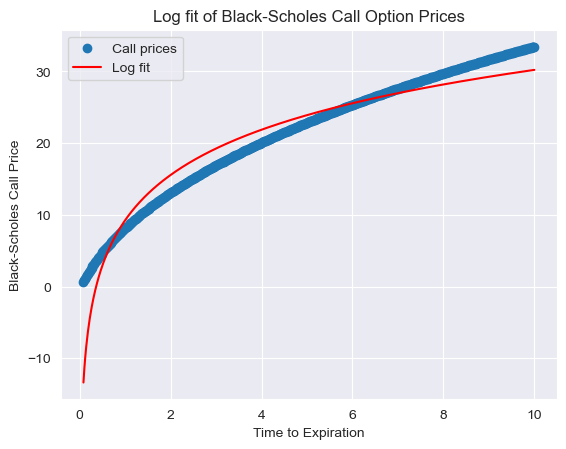

In [3]:
def log_model(x,a,b):
    return a*np.log(x)+b

times = np.linspace(1/12, 10, 500)
y = [bs_call(100, 110, .3, t) for t in times]

popt, pcov = curve_fit(log_model, times, y)

a,b = popt

y_fit = log_model(times, *popt)

plt.scatter(times, y, label='Call prices')
plt.plot(times, y_fit, color='red', label='Log fit')
plt.title('Log fit of Black-Scholes Call Option Prices')
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.legend()
plt.show()



The next few observations come from engaging with the sliders in the above plot.

6.) As $K$ tends to get further from $S(0)$, a new inflection point appears in the graph. One should expect this, as the premium should be low if the price of the stock is unlikely to be higher than $K$ at the valuation date. We show later that the inflection is related to how long it takes for the expected value of $S(t)$ to get close to $K$.

7.) When $K<S(0)$ the graph is immediately lifted by the value $S(0) - K$. This is another feature of the model, as for small values of $t$, it is HIGHLY likely that the contract would finish in the money, and so the contract must be valued higher to offset this.

8.) Scaling the volatility seemingly linearly scales the rate of change with respect to time. This is interesting, as $d_1$ and $d_2$ are both dependent on $\sigma$, so one would expect a more complex relationship.



## The Theoretical Rate of Change with Respect to Time

The goal of the next section is to rigorously justify (when needed) the claims of the previous section by examining the rate of change of $C(0)$ with respect to time. We'll begin by considering the Black-Scholes call price as a function of time till expiration. Let 

$$C(0,t) := S(0)\Phi(d_1(t)) - Ke^{-rt}\Phi(d_2(t))$$

where

$$
d_1(t) := \frac{\ln\left(\frac{S(0)}{K}\right) + \left(r + \frac{1}{2}\sigma^2\right)t}{\sigma \sqrt{t}}, \quad
d_2(t) := d_1 - \sigma \sqrt{t}.
$$

For ease of notation, we will surpress the variable from now on. We now compute the partial derivative of $ C(0,t) $ with respect to $ t $, using the chain rule. First, note that both $ d_1 $ and $ d_2 $ are functions of $ t $. Differentiating:

$$
\frac{\partial C}{\partial t}
= \frac{\partial}{\partial t} \left[ S(0)\Phi(d_1) - K e^{-rt} \Phi(d_2) \right].
$$

Using the product and chain rules:

$$
\frac{\partial C}{\partial t}
= S(0)\phi(d_1) \cdot \frac{\partial d_1}{\partial t}
+ rK e^{-rt} \Phi(d_2)
- K e^{-rt} \phi(d_2) \cdot \frac{\partial d_2}{\partial t}.
$$

We now compute the derivatives of $ d_1 $ and $ d_2 $:

$$
\frac{\partial d_1}{\partial t}
= \frac{1}{\sigma \sqrt{t}} \left( r + \frac{1}{2}\sigma^2 \right)
- \frac{1}{2} \cdot \frac{\ln\left(\frac{S(0)}{K}\right) + \left(r + \frac{1}{2}\sigma^2\right)t}{\sigma t^{3/2}}
= \frac{r + \frac{1}{2} \sigma^2}{\sigma \sqrt{t}} - \frac{d_1}{2t},
$$

and

$$
\frac{\partial d_2}{\partial t}
= \frac{\partial d_1}{\partial t} - \frac{\sigma}{2\sqrt{t}}.
$$

Plugging these into the expression for $ \frac{\partial C}{\partial t} $, we obtain:

$$
\frac{\partial C}{\partial t}
= S(0)\phi(d_1) \left( \frac{r + \frac{1}{2}\sigma^2}{\sigma \sqrt{t}} - \frac{d_1}{2t} \right)
+ rK e^{-rt} \Phi(d_2)
- K e^{-rt} \phi(d_2) \left( \frac{r + \frac{1}{2}\sigma^2}{\sigma \sqrt{t}} - \frac{d_1}{2t} - \frac{\sigma}{2\sqrt{t}} \right).
$$

This expression gives the time derivative of the Black-Scholes call price in full generality. Let us define:

$$
A := \frac{r + \frac{1}{2} \sigma^2}{\sigma \sqrt{t}}, \quad 
B := \frac{d_1}{2t}, \quad 
C := \frac{\sigma}{2\sqrt{t}}.
$$

Then the expression becomes:

$$
\frac{\partial C}{\partial t}
= A\left[ S(0)\phi(d_1) - K e^{-rt} \phi(d_2) \right]
- B\left[ S(0)\phi(d_1) - K e^{-rt} \phi(d_2) \right]
+ C K e^{-rt} \phi(d_2)
+ rK e^{-rt} \Phi(d_2).
$$

Next, observe that:

$$
\bigg(\frac{\phi(d_1)}{\phi(d_2)}\bigg)^2 = \frac{e^{-d_1^2}}{e^{-(d_1 - \sigma\sqrt{t})^2}} = e^{-2d_1\sigma\sqrt{t}+\sigma^2t}.
$$

But since:

$$
d_1\sigma\sqrt{t} = \ln\bigg(\frac{S(0)}{K}\bigg) - \bigg(r+\frac{\sigma^2}{2}\bigg) t,
$$

we see that:

$$
\bigg(\frac{\phi(d_1)}{\phi(d_2)}\bigg)^2 = e^{-2\ln(\frac{S(0)}{K}) - 2rt-\sigma^2t+\sigma^2t} = \bigg(\frac{K}{S(0)} e^{-rt}\bigg)^2.
$$

Thus it follows that:

$$
S(0)\phi(d_1)   =  K e^{-rt} \phi(d_2),
$$

and hence:

$$
S(0)\phi(d_1) - K e^{-rt} \phi(d_2) = 0.
$$

Substituting into our previous equation for $\frac{\partial C}{\partial t}$ yields:

$$
\frac{\partial C}{\partial t} = \frac{S(0)\sigma\phi(d_1)}{2\sqrt{t}} +rK e^{-rt} \Phi(d_2)
$$

With this equation now derived, we can reexamine the observations of the previous section:

1.) The graph is increasing - The derivative is trivially positive for all times of maturation $t$.

2.) The growth rate tends to 0 as $t\rightarrow \infty$ - For large $t$, $\frac{S(0)\sigma\phi(d_1)}{2\sqrt{t}} \sim \frac{e^{-t}}{\sqrt{t}}$, and $rK e^{-rt} \Phi(d_2) < rK e^{-rt}$, so both terms tend to 0 as $t$ gets large.

3.) The Black-Scholes call option prices tend to $S(0)$ as $t\rightarrow \infty$ - Full justification provided in previous section.

4.) When $K \sim S(0)$, the rate of change is large - When $t$ is small, $d_1 \sim \frac{\log\left(\frac{S(0)}{K}\right)}{\sigma \sqrt{t}}$, so $\phi(d_1) \sim \exp\bigg({-\frac{\log\left(\frac{S(0)}{K}\right)^2}{t}}\bigg)$. Because of the assumption on $K$, we conclude that $\phi(d_1) \approx 1$, so $\frac{\partial C}{\partial t}$ behaves like $\frac{1}{\sqrt{t}}$.

5.) This curve is NOT logarithmic - Enough justification provided in previous section.

6.) An inflection point appears as $K$ deviates from $S(0)$ - As there does not exist a "simple" closed form solution for the second time derivative of the price of the call option, we'll have to employ other techniques. To this end, we'll create another interactive plot to see when the inflection point occurs.

In [ ]:
def update_plot(S0=100, K=110, sigma = 0.3):
    clear_output(wait=True)
    times = np.linspace(1/12, 10, 500)

    y = [bs_call_t_deriv_approx(S0, K, sigma, t) for t in times]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(times, y)
    plt.ylim(0, 20)
    plt.title('Call Option Price Time Derivative vs Time to Maturity')
    plt.xlabel('Time to Expiration')
    plt.ylabel('Call Price Rate of Change')
    plt.grid(True)
    plt.show()

# Sliders
S0_slider = widgets.IntSlider(value=100, min=75, max=150, step=1, description='S0:')
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')

# Arrange sliders
slider_box = widgets.VBox([S0_slider, K_slider, sigma_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'S0': S0_slider, 'K': K_slider, 'sigma': sigma_slider})

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

6 cont.) The plot reveals that, for $95 \leq< K \leq 105$, the graph is strictly concave. However, as $K$ strays from this range, the function becomes convex on a sub-interval of $(0,1)$. While this behavior is interesting, its use is questionable.

7.) When $K<S(0)$, $C(0)$ is close to $S(0) - K$ for small $t$ - Enough justification provided in the previous section.

8.) The price scales linearly as the volatility changes - We once again turn to the interactive plot. While this claim is not true outright, it should be noted that points after $t=4$ are each approximately moved up by the same amount as $\sigma$ varies. This explains the observed behavior for large $t$.

# Spot Price Sensitivity of a Call Option

## Observations from the Visual

The following code creates a visual for the price of a the call option as a sunction of the spot price $S(0)$ with adjustable parameters $K, t, \sigma$.

In [ ]:
def update_plot(K=110, sigma = 0.3, t = 1):
    clear_output(wait=True)
    prices = np.linspace(50, 200, 500)

    y = [bs_call(p, K, sigma, t) for p in prices]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(prices, y)
    plt.ylim(0, 150)
    plt.title('Call Option Price vs Spot Price')
    plt.xlabel('Spot Price')
    plt.ylabel('Call Option Price')
    plt.grid(True)
    plt.show()

# Sliders
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')
t_slider = widgets.FloatSlider(value=1, min=1/12, max=10, step=1/12, description='t:')

# Arrange sliders
slider_box = widgets.VBox([K_slider, sigma_slider, t_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'K': K_slider, 'sigma': sigma_slider, 't': t_slider, })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

We once again record observations about the graph and provide nonrigorous justifications for why the graph has these properties.

1.) The graph is increasing. This is to be expected, as the option contract should be more valuable the more the spot price increases without varying the strike price.

2.) The rate of change of the call option contract price with respect to the asset price is almost 0 for low spot prices. For the call option to have any value, there should be a reasonable chance the contract finishes in the money. However, when the spot price is much lower than the strike price, this is unlikely to happen, and thus the contract should be almost worthless. Furthermore, it should continue to be nearly worthless until $S(0)$ is close to $K$, so the rate of change must also be low when $S(0)<<K$.

3.) The curve almost appears hyperbolic. In fact, the below code provides strong evidence for this assertion:

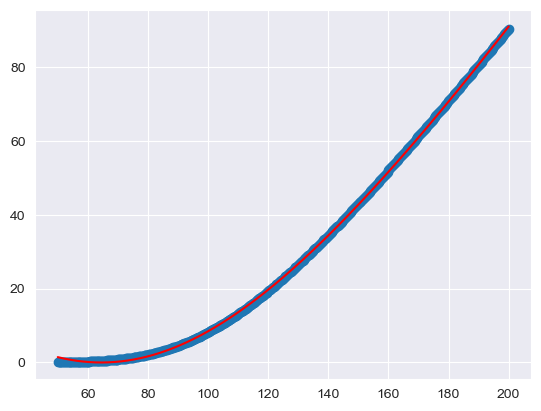

In [6]:
def hyperbola_model(x,a,b,h,k):

    return np.sqrt(a**2+((a**2)*(x-h)**2)/(b**2))+k

prices = np.linspace(50,200,500)
y = [bs_call(price, 110, .3, 1) for price in prices]

popt, popc = curve_fit(hyperbola_model, prices, y)

a,b,h,k = popt

y_fit = hyperbola_model(prices, *popt)

plt.scatter(prices, y)
plt.plot(prices, y_fit, color='red')

3 cont.) Furthermore, it's not specific to the initial parameters, as proven by the following code:

In [ ]:
def update_plot(K=110, sigma = 0.3, t = 1):
    clear_output(wait=True)
    prices = np.linspace(50, 200, 500)

    y = [bs_call(p, K, sigma, t) for p in prices]
    popt, popc = curve_fit(
        hyperbola_model,
        prices,
        y,
        p0=[20, 1, 100, 0],
        bounds=([0.01, 0.01, 0, -100], [1000, 1000, 200, 200])
    )
    y_fit = hyperbola_model(prices, *popt)

    print(popt)

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(prices, y)
    plt.plot(prices, y_fit, 'r--')
    plt.ylim(0, 150)
    plt.title('Call Option Price vs Spot Price')
    plt.xlabel('Spot Price')
    plt.ylabel('Call Option Price')
    plt.grid(True)
    plt.show()

# Sliders
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')
t_slider = widgets.FloatSlider(value=1, min=1/12, max=10, step=1/12, description='t:')

# Arrange sliders
slider_box = widgets.VBox([K_slider, sigma_slider, t_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',  # light grey
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'K': K_slider, 'sigma': sigma_slider, 't': t_slider, })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

3 cont.) Notice that, while the fit does get worse for larger $K$, it is still relatively consistent. A heuristic analysis will be difficult for a claim such as this, but the next bullet point will provide slightly more clarity about why this is being observed. A more thorough analysis will be provided in the section on theory.

4.) There's a clear slant asymptote appearing for large spot prices. Furthermore, the asymptote seems to be $C(0)= S(0) - K$, as shown by the below code (feel free to vary the slider for $K$ to get a clearer picture):

In [ ]:
def update_plot(K=110, sigma = 0.3, t = 1):
    clear_output(wait=True)
    prices = np.linspace(50, 200, 500)

    y = [bs_call(p, K, sigma, t) for p in prices]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(prices, y)
    plt.plot(prices, prices - K, 'r--')
    plt.ylim(0, 150)
    plt.title('Call Option Price vs Spot Price')
    plt.xlabel('Spot Price')
    plt.ylabel('Call Option Price')
    plt.grid(True)
    plt.show()

# Sliders
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')
t_slider = widgets.FloatSlider(value=1, min=1/12, max=10, step=1/12, description='t:')

# Arrange sliders
slider_box = widgets.VBox([K_slider, sigma_slider, t_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'K': K_slider, 'sigma': sigma_slider, 't': t_slider, })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

4 cont.) This behavior is similar to that which was observed in bullet point 7.) in the previous analysis: with a high spot price and a low strike price, the probability the asset ends in the money is much higher. Thus the option contract price must reflect this by being at least as valuable as buying the asset now and holding onto it until the time to maturity.

5.) Varying $\sigma$ has the interesting effect of slightly changing the convexity of the function. This likely means the higher the volatility, the higher the expected payoff of the option contract, and thus the rate of change should increase as well.

6.) Varying $t$ has an similar effect; it similarly scales the convexity of the graph. The reasoning is largely the same too- as the time to maturation increases, the contract is more likely to end in the money, and thus the rate of change of the price of the contract should increase as well.

# The Theoretical Rate of Change with Respect to Spot Price

We once again seek to rigorously justify the claims of the previous section by directly calculating the theoretical rate of change of the call option price with respect to the spot price. To this end, let 

$$C(0,S(0)) := S(0)\Phi(d_1(S(0))) - Ke^{-rt}\Phi(d_2(S(0)))$$

where

$$
d_1(S(0)) := \frac{\ln\left(\frac{S(0)}{K}\right) + \left(r + \frac{1}{2}\sigma^2\right)t}{\sigma \sqrt{t}}, \quad
d_2(S(0)) := d_1 - \sigma \sqrt{t}.
$$

We once again supress the variable in the following lines. Note that:

$$
\frac{\mathrm{\partial}C}{\mathrm{\partial}S(0)}
= \Phi\bigl(d_1\bigr)
+ S(0)\cdot\phi\bigl(d_1\bigr)\cdot\frac{\mathrm{\partial}d_1}{\mathrm{\partial}S(0)}
- K e^{-rt}\,\phi\bigl(d_2\bigr)\cdot\frac{\mathrm{\partial}d_1}{\mathrm{\partial}S(0)}.
$$

From the previous derivation, we know that:

$$
S(0)\phi(d_1)   =  K e^{-rt} \phi(d_2),
$$

so we get:

$$
\frac{\mathrm{\partial}C}{\mathrm{\partial}S(0)}
= \Phi\bigl(d_1\bigr)
+ S(0)\cdot\phi\bigl(d_1\bigr)\cdot\frac{\mathrm{\partial}d_1}{\mathrm{\partial}S(0)}
- S(0)\,\phi\bigl(d_1\bigr)\cdot\frac{\mathrm{\partial}d_2}{\mathrm{\partial}S(0)}.
$$

Finally, since $\frac{\mathrm{\partial}d_2}{\mathrm{\partial}S(0)}=\frac{\mathrm{\partial}d_1}{\mathrm{\partial}S(0)}$, we obtain:

$$
\frac{\mathrm{\partial}C}{\mathrm{\partial}S(0)}
= \Phi\bigl(d_1\bigr)

$$

We may now return to our previous observations and prove their validity.

1.) The graph is increasing - This is obvious now, as $\Phi$ is a cumulative distribution function and thus is always greater than 0.

2.) The rate of change is almost 0 when the spot price is small relative to $K$ - When $S(0)<\frac{1}{2} \cdot K$, we see that $d_1 < 0$, and thus the rate of change is at most $\Phi(0) = \frac{1}{2}$.

3.) The curve is well-approximated by a hyperbola - The key to the reasoning of this insight lies behind one crucial fact involving a sigmoid curve. We will illustrate this through the following code:

In [ ]:
def sigmoid(x):

    return 1/(1+np.exp(-x))

def sigmoid_update_plot(alpha):

    dx = np.linspace(-4, 4, 100)

    plt.figure(figsize = (9,6), dpi=180)
    plt.plot(dx, norm.cdf(dx), label = r'$y = \Phi(x)$')
    plt.plot(dx, sigmoid(alpha * dx), label = r'$y = \frac{1}{1-e^{-\alpha x}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

alpha_slider = widgets.FloatSlider(value= 1, min=0, max=3, description = '\u03B1')

slider_box = widgets.VBox([alpha_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='430px',
    align_items='stretch'
)

ui = widgets.interactive_output(sigmoid_update_plot, {'alpha': alpha_slider})

layout = widgets.HBox([ui, slider_box])

display(layout)


3 cont.) Adjusting the sldier to $\alpha \approx 1.7$ yields a very close fit. One can run an optimization to determine precisely which $\alpha$ yields the best fit, but using $\alpha = 1.7$ will suffice for our needs. Let the function defining the sigmoid curve be $s(x):= \frac{1}{1+e^{-x}} $ Observe that:

$$
2s(2x) - 1 = \frac{2}{1+e^{-2x}} - 1 = \frac{2e^x}{e^x+e^{-x}} - 1 = \frac{e^x - e^{-x}}{e^x+e^{-x}} = \tanh(x)
$$

Denote by $C(0,x)$ the call option price as a function of the spot price. This gives:

$$
C(0,x) = \int\Phi(d_1(x)) \ dx \approx \int \frac{1}{1+e^{-1.7 d_1(x)}} \ dx = \int \frac{\tanh(.085\cdot d_1(x))+1}{2} \ dx
$$

This provides an idea of why hyperbolic functions are showing up as good approximations, but it should be noted that this approximation is likely only "good" near the asymptote and close to 0- the behavior in the range where the spot price is close to the strike price often suffers from the approximation. This is important, as this is often the conditions under which one would buy an option contract. Thus, using this approximation should be considered dangerous in general.

4.) There is a slant asymptote as $S(0)$ moves further from $K$- A slant asymptote corresponds to a horizontal asymptote in the derivative. Given that we now have the exact formula for the derivative, we can verify by inspection that the derivative approaches a constant as $S(0)$ tends to $\infty$.

5.) Scaling $\sigma$ scales the convexity - Taking a derivative with respect to the spot price once more yields:

$$
\frac{\mathrm{\partial^2}C}{\mathrm{\partial}S(0)^2} = \frac{\phi(d1)}{d_1\sigma\sqrt{t}}
$$

Thus, as $\sigma$ increases, the overall convexity tends to 0, thus widening the curve. It should be noted that, since $d_1$ is a function of sigma, the $\phi(d_1)$ term is also altered by adjusting sigma, but those affects aren't as appearant when $S(0)$ is far from $K$.

6.) Scaling $t$ scales the convexity - Looking at the previous bullet point reveals why these two parameters have virtually the same effect when adjusted- they both scale the convexity by a factor, but $t$ approximately linearly scales the square of the second derivative (the caveat involving the altering of $d_1$ applies here as well).

The following is a visual aid to help the reader see why some of these changes occur in the derivative. It's never directly used in any of the previous bullet points, but it can still aid in understanding.

In [ ]:
def update_plot(K=110, sigma = 0.3, t = 1):
    clear_output(wait=True)
    prices = np.linspace(50, 200, 500)

    d1 = (np.log(prices/K) + (.5*sigma**2)*t)/(sigma*np.sqrt(t))
    y = norm.cdf(d1)

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(prices, y)
    plt.ylim(0, 1)
    plt.title('Call Option Price Derivative vs Spot Price')
    plt.xlabel('Spot Price')
    plt.ylabel('Call Option Price Derivative')
    plt.grid(True)
    plt.show()

# Sliders
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')
t_slider = widgets.FloatSlider(value=1, min=1/12, max=10, step=1/12, description='t:')

# Arrange sliders
slider_box = widgets.VBox([K_slider, sigma_slider, t_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'K': K_slider, 'sigma': sigma_slider, 't': t_slider, })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

# Time Sensitivity of a Put Option

## Observations from the Visual

We now turn our attention towards put options. Before we begin, it should be noted that many of the proceeding observations will be dual to those of the call options. This has the effect of making the analysis less insightful overall. Below is another interactive graph that helps visualize the way various parameters affect the rate of change of the put option with respect to time to expiration.


In [ ]:
def update_plot(S0 = 100, K=110, sigma = 0.3):
    clear_output(wait=True)
    times = np.linspace(1/12, 10, 500)

    y = [bs_put(S0, K, sigma, t) for t in times]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(times, y)
    plt.ylim(0, 100)
    plt.title('Put Option Price vs Time to Expiration')
    plt.xlabel('Time')
    plt.ylabel('Put Option Price')
    plt.grid(True)
    plt.show()

# Sliders
S0_slider = widgets.IntSlider(value=100, min=75, max=200, step=1, description='S0:')
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')

# Arrange sliders
slider_box = widgets.VBox([S0_slider, K_slider, sigma_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'S0': S0_slider, 'K': K_slider, 'sigma': sigma_slider })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

We begin recording our observations and nonrigorous justifications.

1.) The graph is almost identical in structure to the call option prices. The following plot verifies this. 

In [ ]:
def update_plot(S0 = 100, K=110, sigma = 0.3):
    clear_output(wait=True)
    times = np.linspace(1/12, 10, 500)

    y1 = [bs_put(S0, K, sigma, t) for t in times]
    y2 = [bs_call(S0, K, sigma, t) for t in times]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(times, y1, label='Put Option')
    plt.plot(times, y2, label='Call Option')
    plt.ylim(0, 100)
    plt.title('Contract Prices vs Time to Expiration')
    plt.xlabel('Time')
    plt.ylabel('Contract Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sliders
S0_slider = widgets.IntSlider(value=100, min=75, max=200, step=1, description='S0:')
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')

# Arrange sliders
slider_box = widgets.VBox([S0_slider, K_slider, sigma_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'S0': S0_slider, 'K': K_slider, 'sigma': sigma_slider })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)


1 cont.) In theoretical terms, this comes from the call-put parity; since $C(0)-P(0) = S(0) - Ke^{-rt}$, and we're currently assuming a risk-free interest rate of 0, the graphs are the same, but shifted by a constant. Another way to notice this is to set $S(0) = K$ using the sliders above. Without appealing to mathematics, we should expect this because for longer periods of time, the standard model of geometric Brownian motion would expect the contract to finish in the money with about the same probability as the contract finishing out of the money. Thus, there is a kind of symmetry between the two when $t$ is large. This doesn't, however, explain why the function is nearly identical for small $t$ as well. For this, we will wait for the more thorough analysis in the next subsection.

2.) The graph is increasing. As before, we observed that as time went on, the more likely the contract is to finish far in the money, and thus be more valuable.

3.) The growth rate is once again shrinking as time progresses. The reasoning from before applies here as well- for large $t$, $\Phi(d_1)$ approaches 1, and thus the growth rate must shrink. However, instead of $\Phi(d_1)$, the value of the put option is dependent on $-\Phi(-d_1)$, which has the same growth rate as $\Phi(d_1)$ (since $\phi(d_1)$ is an even function).

4.) The put option becomes more valuable at a higher rate for small maturation times $t$. This is because it is unlikely to finish out of the money for small times $t$ (assuming $K>S(0)$), and the probability the contract ends further in the money rapidly increases as the time to maturation increases.

5.) Adjusting the sliders has the exact same effects as before. We will wait until the detailed analysis until we address this.

## The Theoretical Rate of Change with Respect to Time

In this section, we'll compute the theoretcial rate of change with respect to time once more, but we'll use call-put parity to get at the result in a more efficient way. Recall that:

$$
C(0,t)-P(0,t) = S(0) - Ke^{-rt},
$$

so

$$
\frac{\partial C}{\partial t} - \frac{\partial P}{\partial t} = rKe^{-rt}.
$$

Thus

$$
\frac{\partial P}{\partial t} = \frac{\partial C}{\partial t} - rKe^{-rt}.
$$

With this equation, we can now analyze our previous claims.

1.) The functions are identical with the addition of a constant- We see that the derivatives of the function are identical with an assumed risk-free interest rate of 0. Thus the overall shape and observed behavior should be largely the same.

2.) The graph is increasing- It was observed before that $\frac{\partial C}{\partial t}$ is a positive function, so $\frac{\partial P}{\partial t}$ is as well.

3.) The growth rate is approaching 0 as $t$ gets large- This was behavior observed before in the analysis of $\frac{\partial C}{\partial t}$, and it's once more clear why it shows up here as well.

4.) The growth rate is high for small $t$- Once again, this was noted in the analysis of $\frac{\partial C}{\partial t}$.

5.) The varying of the sliders has the same effects on the graph as was the case in the call option case- Now we know this is because the shape of the graph, which is completely determined by the derivatives, is identical because $\frac{\partial P}{\partial t} = \frac{\partial C}{\partial t}$ for a risk-free interest rate of 0.

We'll once again provide an interactive plot so that one can visualize some of the previously mentioned observations.

In [ ]:
def update_plot(S0 = 100, K=110, sigma = 0.3):
    clear_output(wait=True)
    times = np.linspace(1/12, 10, 500)

    y = [bs_call_t_deriv_approx(S0, K, sigma, t) for t in times]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(times, y)
    plt.ylim(0, 100)
    plt.title('Put Option Price vs Time to Expiration')
    plt.xlabel('Time')
    plt.ylabel('Put Option Price')
    plt.grid(True)
    plt.show()

# Sliders
S0_slider = widgets.IntSlider(value=100, min=75, max=200, step=1, description='S0:')
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')

# Arrange sliders
slider_box = widgets.VBox([S0_slider, K_slider, sigma_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'S0': S0_slider, 'K': K_slider, 'sigma': sigma_slider })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

# Spot Price Sensitiviy of a Put Option

We provide another visual that provides insight on how the varying of the parameters affects the curve.

In [ ]:
def update_plot(K=110, sigma = 0.3, t = 1):
    clear_output(wait=True)
    prices = np.linspace(50, 200, 500)

    y = [bs_put(p, K, sigma, t) for p in prices]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(prices, y)
    plt.ylim(0, 150)
    plt.title('Call Option Price vs Spot Price')
    plt.xlabel('Spot Price')
    plt.ylabel('Call Option Price')
    plt.grid(True)
    plt.show()

# Sliders
K_slider = widgets.IntSlider(value=110, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')
t_slider = widgets.FloatSlider(value=1, min=1/12, max=10, step=1/12, description='t:')

# Arrange sliders
slider_box = widgets.VBox([K_slider, sigma_slider, t_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'K': K_slider, 'sigma': sigma_slider, 't': t_slider, })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

Below are some observations and heuristic arguments explaining the behaviour of the plot.

1.) This graph is *almost* a mirror of the the call option as a function of spot price. In particular, the approximate symmetry seems to be about the line $S(0) = K$, as shown by the below plot:

In [ ]:
def update_plot(K=120, sigma = 0.3, t = 1):
    clear_output(wait=True)
    prices = np.linspace(50, 200, 500)

    y_1 = [bs_put(p, K, sigma, t) for p in prices]
    y_2 = [bs_call(p, K, sigma, t) for p in prices]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(prices, y_1, label='Put price')
    plt.plot(prices, y_2, label='Call price')
    plt.axvline(x = K, color = 'red', linestyle ='--')
    plt.plot()
    plt.ylim(0, 150)
    plt.title('Contract Price vs Spot Price')
    plt.xlabel('Spot Price')
    plt.ylabel('Contract Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sliders
K_slider = widgets.IntSlider(value=120, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')
t_slider = widgets.FloatSlider(value=1, min=1/12, max=10, step=1/12, description='t:')

# Arrange sliders
slider_box = widgets.VBox([K_slider, sigma_slider, t_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'K': K_slider, 'sigma': sigma_slider, 't': t_slider, })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

1 cont.) It seems as though the rate of change for the call is slightly higher than the rate of decrease of a put option. In the next section, we will prove this is a fact by using the Black-Scholes formulas for option contracts. We should expect this behavior because we expect the value of a call option, say, $5 in the money to have the approximately the same value as a put option $5 in the money. This ellucidates why we expect a kind of vertical reflection.

2.) The graph is decreasing. Of course, the contract should become less valuable as the spot price increases without varying the strike price, as if the buyer were to invoke the contract, they would be making less money as the spot price increased.

3.) Notice that the rate of change tends towards towards 0 as the spot price gets large. This is because the likelihood of the contract finishing in the money is slim, so the value is low, but stil trivially greater than 0. Thus the rate of change needs to reflect this.

4.) This graph, too, is well approximated by a hyperbola. Thus it also features a slant aymptote, but now it's the line $C(0) = K-S(0)$, as demonstrated below.

In [ ]:
def update_plot(K=120, sigma = 0.3, t = 1):
    clear_output(wait=True)
    prices = np.linspace(50, 200, 500)

    y_1 = [bs_put(p, K, sigma, t) for p in prices]
    y_2 = [K-p for p in prices]

    plt.figure(figsize=(6, 4), constrained_layout=True, dpi=180)
    plt.plot(prices, y_1, label='Put price')
    plt.plot(prices, y_2, 'r--')
    plt.plot()
    plt.ylim(0, 150)
    plt.xlim(50, 200)
    plt.title('Contract Price vs Spot Price')
    plt.xlabel('Spot Price')
    plt.ylabel('Contract Price')
    plt.grid(True)
    plt.show()

# Sliders
K_slider = widgets.IntSlider(value=120, min=50, max=200, step=1, description='K:')
sigma_slider = widgets.FloatSlider(value=0.3, min=0.2, max=0.5, step=0.01, description='σ:')
t_slider = widgets.FloatSlider(value=1, min=1/12, max=10, step=1/12, description='t:')

# Arrange sliders
slider_box = widgets.VBox([K_slider, sigma_slider, t_slider])
slider_box.layout = widgets.Layout(
    border='1px solid lightgray',
    padding='10px',
    background_color='#f0f0f0',
    width='340px',
    align_items='stretch'
)

# Hook up interactivity
ui = widgets.interactive_output(update_plot, {'K': K_slider, 'sigma': sigma_slider, 't': t_slider, })

# Display side-by-side: plot on the left, sliders on the right
layout = widgets.HBox([ui, slider_box])
display(layout)

4 cont.) As we saw previously, the contract should be about as valuable as the expected payoff if the probability the contract finishes in the money is high. This is the case here because the spot price is much smaller than the strike price.

5.) Once again, the sliders have seemingly identical effects as what was observed in the call option case. We will once again discuss why we expect this in the section on theory.

# The Theoretical Rate of Change with Respect to Spot Price

Once more, call-put parity eases the load of calculation tremendously. Observe that:

$$
\frac{\partial C}{\partial S(0)} - \frac{\partial P}{\partial S(0)} = 1.
$$

Thus 

$$
\frac{\partial P}{\partial S(0)} =\frac{\partial C}{\partial S(0)} - 1.
$$

This revelation of the relationship between the call and put prices allows us to explain the previous observations

1.) The graphs are almost identical after a reflection- The general shape of the curves are mostly the same, as obsevred before, but now we see this is a consequence of the fact that the rates of change are the same, just shifted by a constant.

2.) The graph is decreasing- As $\frac{\partial C}{\partial S(0)} < 1$, we can see that $\frac{\partial P}{\partial S(0)}<0$.

3.) The rate of change tends to 0 as the spot price gets large - We previously observed that $\frac{\partial P}{\partial S(0)}$ tends to 1 as the spot price gets large. This implies that $\frac{\partial P}{\partial S(0)}\rightarrow 0$.

4.) The graph is well-approximated by a hyperbola with a slant asymptote at $C(0) = K-S(0)$- The general structure is the same as in the case of the call option, and hence the approximation by a hyperbola is good. Furthermore, we see that the asymptote appears because $\frac{\partial P}{\partial S(0)}\rightarrow -1$ as $S(0)$ gets small.

5.) The parameters vary the graph in the same way- This is because the derivative of the function only differs from the case of the call option by a constant, and this behavour was observed in the case of the call option.

# Q&A

### Question: Why is there no observation pertaining to the $S(0)$ slider in the first analysis?

At first glance, this may seem like a missed opportunity for a more thorough analysis. However, a closer look reveals the reasoning behind the omission. Varying $S(0)$ has two main effects: it changes the ratio $\frac{S(0)}{K}$ and linearly scales the first term in $C(0)$. To analyze the effects of the ratio, it's sufficient to vary $K$ instead, which was already done in the first analysis. Furthermore, a linear scaling is not particularly informative in this context, so it was deemed unnecessary to include.



---